<a href="https://colab.research.google.com/github/SandipPalit/ML-CODES/blob/main/Regression/RegressionSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from tabulate import tabulate

import warnings

In [2]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### Input Dataset

In [3]:
df = pd.read_csv('/content/realtor-data.csv',low_memory=False)

In [4]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


### Preprocessing

In [5]:
df.describe(include='all')

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
count,203126,2.031260e+05,171963.000000,172835.000000,151066.000000,203126,203041,203074,203126,202931.000000,1.734480e+05,75339
unique,2,NaN,NaN,NaN,NaN,20753,20541,707,12,NaN,NaN,4722
top,for_sale,NaN,NaN,NaN,NaN,"4 Glen Ellen Blvd, Millis, MA, 02054",4 Glen Ellen Blvd,Boston,Massachusetts,NaN,NaN,2004-06-30
freq,202452,NaN,NaN,NaN,NaN,210,210,31483,150792,NaN,NaN,140
mean,NaN,8.683271e+05,3.534493,2.620129,8.730882,NaN,NaN,NaN,NaN,2159.784769,2.234716e+03,NaN
std,NaN,1.433730e+06,2.696704,2.939190,634.635361,NaN,NaN,NaN,NaN,1743.024350,4.221611e+03,NaN
min,NaN,1.000000e+00,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,601.000000,1.000000e+02,NaN
25%,NaN,2.499000e+05,2.000000,2.000000,0.130000,NaN,NaN,NaN,NaN,1230.000000,1.152000e+03,NaN
50%,NaN,5.199000e+05,3.000000,2.000000,0.330000,NaN,NaN,NaN,NaN,2025.000000,1.728000e+03,NaN
75%,NaN,8.899000e+05,4.000000,3.000000,1.140000,NaN,NaN,NaN,NaN,2176.000000,2.634000e+03,NaN


In [6]:
# taking only a subset, for faster result
df=df[df['state']=='Massachusetts']

In [7]:
# removing Status, Full Address, Street, city, state & Sold Date columns.
df=df.drop(['status','full_address','street','city','state','sold_date'],axis=1)

In [8]:
# removing Null
df=df.dropna()

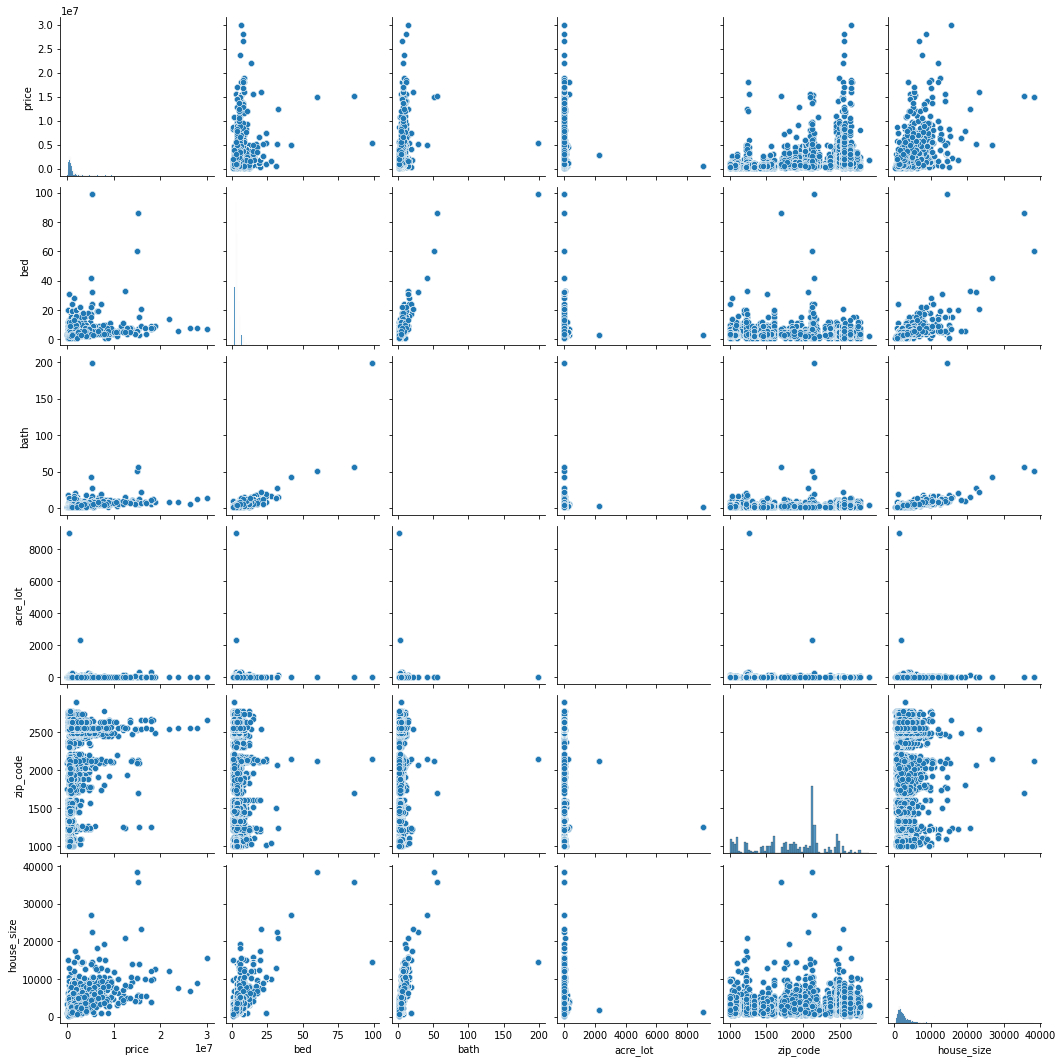

In [9]:
sns.pairplot(df)

In [10]:
#Standardisation
standardScalerP=StandardScaler()
df['price']=standardScalerP.fit_transform(df[['price']])

standardScalerBE=StandardScaler()
df['bed']=standardScalerBE.fit_transform(df[['bed']])

standardScalerBA=StandardScaler()
df['bath']=standardScalerBA.fit_transform(df[['bath']])

standardScalerA=StandardScaler()
df['acre_lot']=standardScalerA.fit_transform(df[['acre_lot']])

standardScalerZ=StandardScaler()
df['zip_code']=standardScalerZ.fit_transform(df[['zip_code']])

standardScalerH=StandardScaler()
df['house_size']=standardScalerH.fit_transform(df[['house_size']])

In [11]:
# removing Null
df=df.dropna()

In [12]:
df.head()

,price,bed,bath,acre_lot,zip_code,house_size
24231,-0.606311,-0.638738,-0.505241,-0.028040,-1.834284,-0.920734
24236,-0.565869,-0.341772,-0.505241,-0.026634,-1.834284,-0.674970
24237,-0.373380,-0.341772,0.006567,-0.026751,-1.834284,-0.146577
24238,-0.532111,-0.341772,-0.249337,-0.027806,-1.834284,-0.637160
24241,-0.542170,-0.044807,-0.249337,-0.030734,-1.834284,-0.421644


### Model Training

In [13]:
Y=df[['price']]
X=df.drop(['price'],axis=1)

In [14]:
X.head()

,bed,bath,acre_lot,zip_code,house_size
24231,-0.638738,-0.505241,-0.028040,-1.834284,-0.920734
24236,-0.341772,-0.505241,-0.026634,-1.834284,-0.674970
24237,-0.341772,0.006567,-0.026751,-1.834284,-0.146577
24238,-0.341772,-0.249337,-0.027806,-1.834284,-0.637160
24241,-0.044807,-0.249337,-0.030734,-1.834284,-0.421644


In [15]:
Y.head()

,price
24231,-0.606311
24236,-0.565869
24237,-0.373380
24238,-0.532111
24241,-0.542170


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Linear Regression

In [17]:
regLR=LinearRegression()
regLR.fit(X_train,Y_train)
yPredRegLR=regLR.predict(X_test)
mean_squared_error(yPredRegLR, Y_test)

0.4535745709441402

### Support Vector Regression

In [18]:
regSVR=SVR(kernel='linear')
regSVR.fit(X_train,Y_train)
yPredRegSVR=regSVR.predict(X_test)
mean_squared_error(yPredRegSVR, Y_test)

0.4933566625917738

### Decision Tree Regression

In [19]:
regDTR=DecisionTreeRegressor()
regDTR.fit(X_train,Y_train)
yPredRegDTR=regDTR.predict(X_test)
mean_squared_error(yPredRegDTR, Y_test)

0.0032592568936858925

### Random Forest Regression

In [20]:
regRFR=RandomForestRegressor()
regRFR.fit(X_train,Y_train)
yPredRegRFR=regRFR.predict(X_test)
mean_squared_error(yPredRegRFR, Y_test)

0.0054726547067806205

### Model Evaluation

In [23]:
data=[
     ["Linear Regression",round(mean_absolute_error(yPredRegLR, Y_test),3),round(np.sqrt(mean_squared_error(yPredRegLR, Y_test)),3),round(r2_score(yPredRegLR, Y_test),3)],
     ["Support Vector Regression",round(mean_absolute_error(yPredRegSVR, Y_test),3),round(np.sqrt(mean_squared_error(yPredRegSVR, Y_test)),3),round(r2_score(yPredRegSVR, Y_test),3)],
     ["Decision Tree Regression",round(mean_absolute_error(yPredRegDTR, Y_test),3),round(np.sqrt(mean_squared_error(yPredRegDTR, Y_test)),3),round(r2_score(yPredRegDTR, Y_test),3)],
     ["Random Forest Regression",round(mean_absolute_error(yPredRegRFR, Y_test),3),round(np.sqrt(mean_squared_error(yPredRegRFR, Y_test)),3),round(r2_score(yPredRegRFR, Y_test),3)] 
    ]
columns=["Model Name","Mean Absolute Error","Root Mean Squared Error","R Squared Error"]

print(tabulate(data, headers=columns, tablefmt="fancy_grid"))

╒═══════════════════════════╤═══════════════════════╤═══════════════════════════╤═══════════════════╕
│ Model Name                │   Mean Absolute Error │   Root Mean Squared Error │   R Squared Error │
╞═══════════════════════════╪═══════════════════════╪═══════════════════════════╪═══════════════════╡
│ Linear Regression         │                 0.327 │                     0.673 │             0.196 │
├───────────────────────────┼───────────────────────┼───────────────────────────┼───────────────────┤
│ Support Vector Regression │                 0.288 │                     0.702 │            -0.597 │
├───────────────────────────┼───────────────────────┼───────────────────────────┼───────────────────┤
│ Decision Tree Regression  │                 0.002 │                     0.057 │             0.997 │
├───────────────────────────┼───────────────────────┼───────────────────────────┼───────────────────┤
│ Random Forest Regression  │                 0.005 │                     0.074 │ 

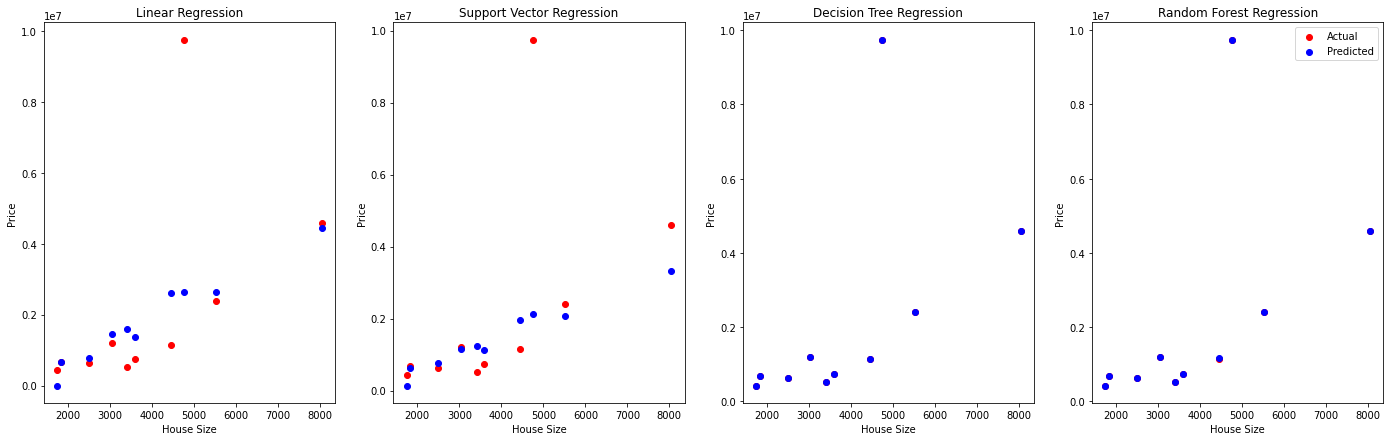

In [22]:
figure, axes = plt.subplots(1, 4, figsize=(24, 7))

axes[0].scatter(standardScalerH.inverse_transform(X_test[['house_size']])[:10], standardScalerP.inverse_transform(Y_test)[:10], color = 'red')
axes[0].scatter(standardScalerH.inverse_transform(X_test[['house_size']])[:10], standardScalerP.inverse_transform(pd.DataFrame(yPredRegLR))[:10], color = 'blue')
axes[0].set_title('Linear Regression')
axes[0].set_xlabel('House Size')
axes[0].set_ylabel('Price')

axes[1].scatter(standardScalerH.inverse_transform(X_test[['house_size']])[:10], standardScalerP.inverse_transform(Y_test)[:10], color = 'red')
axes[1].scatter(standardScalerH.inverse_transform(X_test[['house_size']])[:10], standardScalerP.inverse_transform(pd.DataFrame(yPredRegSVR))[:10], color = 'blue')
axes[1].set_title('Support Vector Regression')
axes[1].set_xlabel('House Size')
axes[1].set_ylabel('Price')

axes[2].scatter(standardScalerH.inverse_transform(X_test[['house_size']])[:10], standardScalerP.inverse_transform(Y_test)[:10], color = 'red')
axes[2].scatter(standardScalerH.inverse_transform(X_test[['house_size']])[:10], standardScalerP.inverse_transform(pd.DataFrame(yPredRegDTR))[:10], color = 'blue')
axes[2].set_title('Decision Tree Regression')
axes[2].set_xlabel('House Size')
axes[2].set_ylabel('Price')

axes[3].scatter(standardScalerH.inverse_transform(X_test[['house_size']])[:10], standardScalerP.inverse_transform(Y_test)[:10], color = 'red', label="Actual")
axes[3].scatter(standardScalerH.inverse_transform(X_test[['house_size']])[:10], standardScalerP.inverse_transform(pd.DataFrame(yPredRegRFR))[:10], color = 'blue', label="Predicted")
axes[3].set_title('Random Forest Regression')
axes[3].set_xlabel('House Size')
axes[3].set_ylabel('Price')

axes[3].legend()